In [2]:
import torch
import os
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import yaml
import cv2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

BASE_DIR = os.getcwd()

In [3]:
# Загрузка модели
model = YOLO('road_signs_detection/yolov8m_training/weights/best.pt')

In [4]:
# Загрузка тестового набора данных
test_dataset_path = BASE_DIR + '/road-signs-2/test'
test_images = [f'{test_dataset_path+'/images'}/{img}' for img in os.listdir(test_dataset_path+'/images')]
test_labels = [f'{test_dataset_path+'/labels'}/{txt}' for txt in os.listdir(test_dataset_path+'/labels')]

In [7]:
# Функция для тестирования модели и сравнения с ground truth
def test_model(model, test_images, test_labels):
    results = []
    true_labels = []
    pred_labels = []
    
    for img_path, label_path in zip(test_images, test_labels):
        # Получение предсказаний модели
        pred = model.predict(img_path)[0]
        results.append(pred)
        
        # Загрузка ground truth меток
        with open(label_path, 'r') as f:
            gt_labels = [int(line.split()[0]) for line in f.readlines()]
            true_labels.extend(gt_labels)
        
        # Получение предсказанных классов
        if len(pred.boxes) > 0:
            pred_classes = pred.boxes.cls.cpu().numpy()
            pred_labels.extend(pred_classes)
        
    return results, true_labels, pred_labels

# Получение результатов и сравнение с ground truth
results, true_labels, pred_labels = test_model(model, test_images, test_labels)



image 1/1 f:\PycharmProjects\randoms\test_OD\road-signs-2\test\images\perintah-pilihan-memasuki-salah-satu-jalur--64-_jpg.rf.ca52a211513d363023f41d44160b6c6a.jpg: 640x640 1 left_right_lane, 202.9ms
Speed: 10.0ms preprocess, 202.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 f:\PycharmProjects\randoms\test_OD\road-signs-2\test\images\perintah-pilihan-memasuki-salah-satu-jalur--66-_jpg.rf.d7da089766ebc56b25d725d23400241d.jpg: 640x640 1 left_right_lane, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 f:\PycharmProjects\randoms\test_OD\road-signs-2\test\images\perintah-pilihan-memasuki-salah-satu-jalur--67-_jpg.rf.1f52990ceee7e516138ad06c843397dc.jpg: 640x640 1 left_right_lane, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 f:\PycharmProjects\randoms\test_OD\road-signs-2\test\images\perintah-pilihan-memasuki-salah-satu-jalur--6

In [32]:
# Функция для создания словаря соответствия id:classname из data.yaml
def create_class_mapping(yaml_path):
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
        # Создаем словарь, где ключ - индекс класса, значение - название класса
        class_mapping = {i: name for i, name in enumerate(data['names'])}
    return class_mapping

# Создаем словарь соответствия классов
yaml_path = BASE_DIR + '/road-signs-2/data.yaml'
class_mapping = create_class_mapping(yaml_path)
print("Соответствие ID классов и их названий:")
for class_id, class_name in class_mapping.items():
    print(f"{class_id}: {class_name}")


Соответствие ID классов и их названий:
0: bus_stop
1: do_not_enter
2: do_not_stop
3: do_not_turn_l
4: do_not_turn_r
5: do_not_u_turn
6: enter_left_lane
7: green_light
8: left_right_lane
9: no_parking
10: parking
11: ped_crossing
12: ped_zebra_cross
13: railway_crossing
14: red_light
15: stop
16: t_intersection_l
17: traffic_light
18: u_turn
19: warning
20: yellow_light


Confusion Matrix:
[[58  3  0  0  7  0  5  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0]
 [ 0  1  1  0 59  0  0  9  0  1]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 67  3  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
Precision: 0.9259485195655408
Recall: 0.8638297872340426
F1 Score: 0.8891284973808413
Accuracy: 0.8638297872340426


c:\Users\Spidrre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


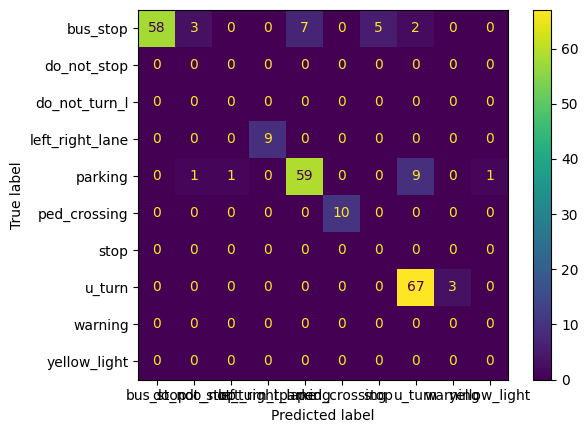

In [41]:
# Вычисление метрик
y_true = true_labels  # Истинные метки
y_pred = pred_labels  # Предсказанные метки

conf_matrix = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

labels_list = [value for key, value in class_mapping.items() if key in pred_labels]

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=labels_list)
disp.plot()
plt.show()


In [46]:
# Проходим по каждому изображению
for img_path in test_images:
    # Загружаем изображение
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Получаем предсказания модели
    results = model(img)
    
    # Получаем боксы, уверенности и классы
    boxes = results[0].boxes.xyxy.cpu().numpy()
    confidences = results[0].boxes.conf.cpu().numpy()
    class_ids = results[0].boxes.cls.cpu().numpy().astype(int)
    
    # Рисуем боксы на изображении
    for box, conf, class_id in zip(boxes, confidences, class_ids):
        x1, y1, x2, y2 = box.astype(int)
        class_name = class_mapping[class_id]
        
        # Рисуем прямоугольник
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Добавляем подпись с названием класса и уверенностью
        label = f'{class_name}: {conf:.2f}'
        cv2.putText(img, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Конвертируем обратно для отображения
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    # Показываем изображение
    cv2.imshow('Detection Result', img)
    
    # Ждем нажатия клавиши (q для выхода)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()



0: 640x640 1 do_not_enter, 180.5ms
Speed: 10.5ms preprocess, 180.5ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 do_not_enter, 9.0ms
Speed: 3.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 left_right_lane, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 left_right_lane, 40.5ms
Speed: 5.0ms preprocess, 40.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 left_right_lane, 58.0ms
Speed: 5.0ms preprocess, 58.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 stop, 150.7ms
Speed: 8.0ms preprocess, 150.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 left_right_lane, 10.5ms
Speed: 3.0ms preprocess, 10.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 left_right_lane, 39.5ms
Speed: 5.0ms preprocess, 39.5ms i